# COVID 19 Vaccination by The Numbers Blog Post


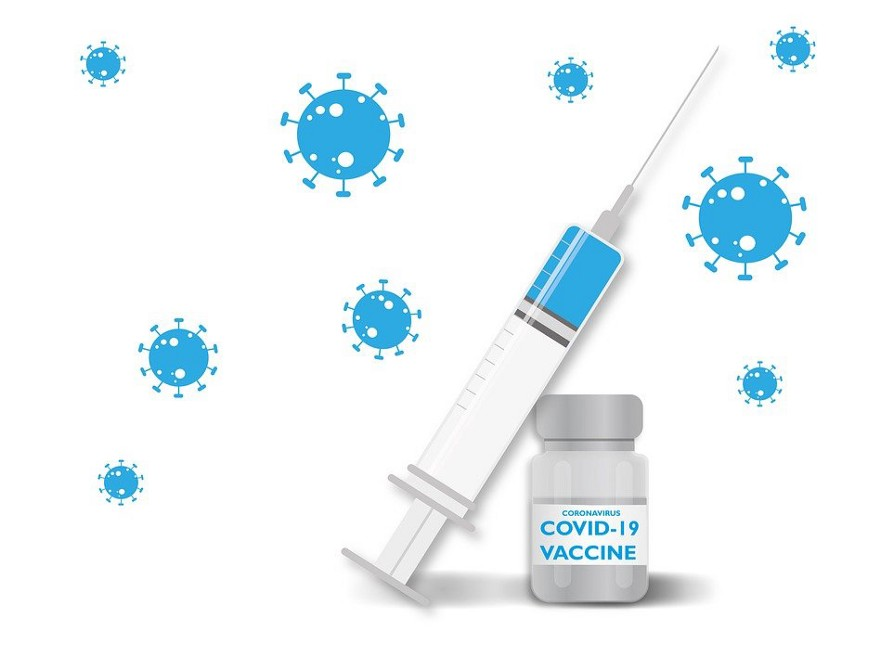


# Introduction

It has been more than three months since the first COVID 19 vaccine named Sputnik V, which is made in Russia, was administered into human arms. Since then, other companies like Oxford/AstraZeneca, Pfizer/BionTech, Moderna and SinoPharm have also come with their version of the vaccine. Three months later, these vaccinations are occurring in so many countries at different rates. This article therefore shows which countries are using these vaccines, how many people have been vaccinated in total, how many people have been vaccinated per hundred and it also shows which companies vaccines are used in being administered among the countries who have been able to manufacture or afford it.

The four scenarios that are looked up in this article are:

1 - What is the total number of vaccination in the world and which countries are leading in the process?

2 - What is the number of total vaccination per one hundred people and which countries are doing well? This helps understand what percentage of a population has been vaccinated and which countries are ahead in the process.

3 - Which vaccine or vaccines are administered the most? 

4 - Which country has the highest usage of a vaccine per hundred people?

This article might bring up some questions on the hows and the whys about the vaccination but the purpose of this article is to demonstrate how datasets like the one used in this article can be used to filter out some important information on the vaccination by using python language using libraries like Pandas, NumPy and MatlibPlot. In addition, the accuracy of this data is based on the file furnished in kaggle.com where the link can be found at the end of the article under sources.

The vaccination is an ongoing process at this point in time and data on the vaccinations are out there in different forms. The dataset chosen for this project is one, with not so many entries, divided by "countries", "dates", "total vaccination", "total vaccination per hundred people and type of vaccination" among others. As all the columns were not needed, only the once mentioned above are put in use.

In [79]:
#important python libraries to handle the datasets and plots
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

#usable columns from the dataset whcih is to be read
col_list = ["country", "total_vaccinations","people_vaccinated_per_hundred", "vaccines"]

#this file is from https://www.kaggle.com/gpreda/covid-world-vaccination-progress under the name country_vaccinations.csv
df = pd.read_csv("covid_19_vaccination.csv", usecols=col_list)

#reads the first 100 rows of the dataset
df.head(100)

,country,total_vaccinations,people_vaccinated_per_hundred,vaccines
0,Albania,0.0,0.00,Pfizer/BioNTech
1,Albania,NaN,NaN,Pfizer/BioNTech
2,Albania,128.0,0.00,Pfizer/BioNTech
3,Albania,188.0,0.01,Pfizer/BioNTech
4,Albania,266.0,0.01,Pfizer/BioNTech
...,...,...,...,...
95,Andorra,NaN,NaN,Pfizer/BioNTech
96,Andorra,NaN,NaN,Pfizer/BioNTech
97,Andorra,NaN,NaN,Pfizer/BioNTech
98,Andorra,NaN,NaN,Pfizer/BioNTech


# 1- What is the total number of vaccination in the world by countries?

As it can be seen from the plot above, these are twenty countries with highest number of of people vaccinated. This plot does not discuss population number, access to vaccination and affordability. Therefore the numbers are based on head count of vaccinated people. The plot down here is for the other twenty countries which got the lowest number of vaccination. This plot does not show countries which didn't get the vaccination at all which could be the case.

In [80]:
#This line groups the dataset by country after it has removed the NaN values from the "total_vaccination" column and sums the total values
group1_df = df.dropna(subset=['total_vaccinations'], axis=0).groupby(['country']).sum()

#This counts the the duplicated country names
num_1 = df.groupby(['country']).size() 

group2_df = group1_df

#the sum of "total_vaccination" values divided by the number of duplicated names
group2_df['people_vaccinated_per_hundred'] = group2_df.apply(lambda x: x['people_vaccinated_per_hundred']/num_1, axis=1) 

##reads the first 10 rows of the dataset
group2_df.head(10)

,total_vaccinations,people_vaccinated_per_hundred
country,,
Albania,31129.0,0.010638
Algeria,75030.0,0.000000
Andorra,9056.0,0.249362
Anguilla,4103.0,0.581915
Argentina,19537827.0,0.612553
Australia,76844.0,0.006383
Austria,12939692.0,1.931064
Azerbaijan,65000.0,0.013617
Bahrain,9815940.0,12.274468


Text(0.5, 1.0, '20 Countries with Lowest Total Vaccination Numbers')

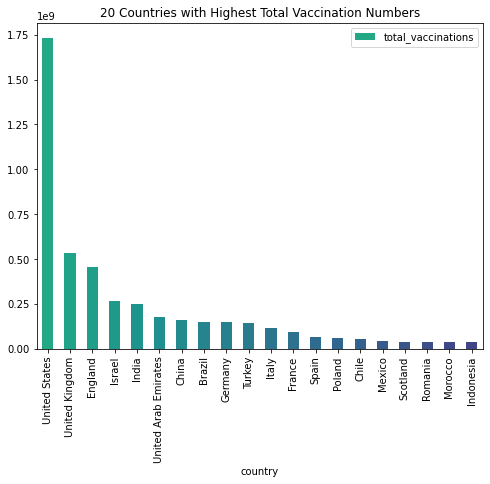

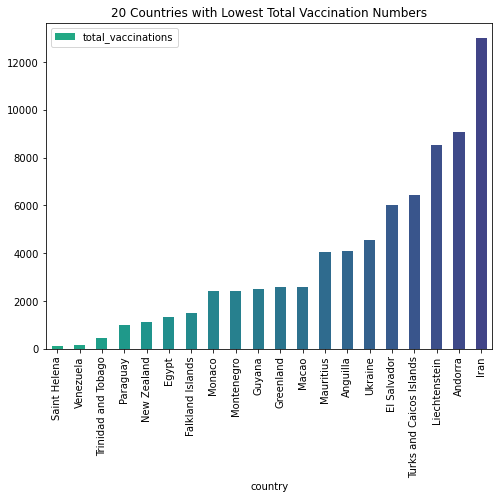

In [94]:
#finds the largest twenty sums of duplicated names
largest_df = group1_df.nlargest(20, 'total_vaccinations') 

#finds the smalles twenty sums of duplicated names
smallest_df = group1_df.nsmallest(20, 'total_vaccinations') 

#color selection
color = cm.viridis_r(np.linspace(.4, .8, 20)) 

#plots the twenty countries with higest number of vaccination
largest_df.plot(y='total_vaccinations', kind='bar', stacked=True, color=color, legend=True, figsize=(8, 6)) 

#plot title
plt.title('20 Countries with Highest Total Vaccination Numbers')

#plots the twenty countries with lowest number of vaccination
smallest_df.plot(y='total_vaccinations', kind='bar', stacked=True, color=color, legend=True, figsize=(8, 6))

#plot title
plt.title('20 Countries with Lowest Total Vaccination Numbers')

# 2-What is the number of total vaccination per one hundred people and which countries are doing well?

The second plot that is going to be observed is that of the number of vaccinated people per one hundred. As populations of the world are different, the highest number of vaccination might not give the right picture of the situation. Therefore, it is advisable to check the percentage of the population which got the vaccination in a population. And as can be seen from the plot above, Israel, a country of  8.5 million population seems to have been doing well. With more than 50% of the population already vaccinated, it is the first out of the twenty leading countries.

Text(0.5, 1.0, '20 Countries with Highest Vaccination Numbers Per Hundred People')

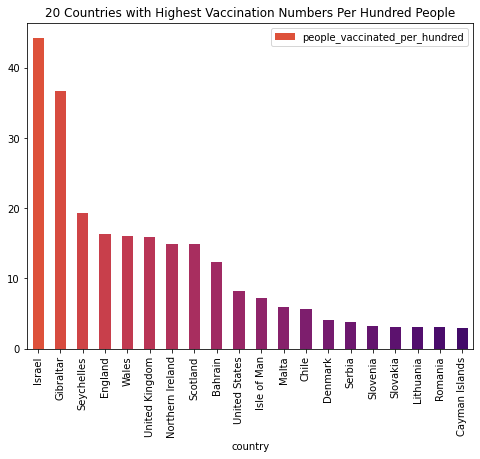

In [82]:
#finding the twenty higest number of vaccination per hundred people
largest_df = group2_df.nlargest(20, 'people_vaccinated_per_hundred')

#color selection
color = cm.inferno_r(np.linspace(.4, .8, 20))

#plots the twenty countries with higest number of vaccination per hundred people
largest_df.plot(y='people_vaccinated_per_hundred', kind='bar', stacked=True, color=color, legend=True, figsize=(8, 6))

#plot title
plt.title('20 Countries with Highest Vaccination Numbers Per Hundred People')

# 3-Which vaccine or vaccines are administered the most?

The Moderna/Pfizer vaccine is leading in total numbers of vaccines used over all. This number doesn't show the share of individual vaccine as the data was prepared this way, but it can give an understandable picture that the Moderna/Pfizer vaccines are leading globally. And looking closely, the Pfizer vaccine is in the first three biggest numbers, therefore, it can be assumed Pfizer might have an advantage over Moderna.

In [83]:
#assigning variable to a different name
group3_df = df

#replacing vaccine names to more suitable ones
replace_df = group3_df.replace(regex="Pfizer/BioNTech", value="Pfizer", inplace=True)
replace_df = group3_df.replace(regex="Oxford/AstraZeneca", value="AstraZeneca", inplace=True)
replace_df = group3_df.replace(regex="Sinopharm/Beijing", value="SinoVac", inplace=True)
replace_df = group3_df.replace(regex="Sinopharm/Beijing", value="SinoVac", inplace=True)
replace_df = group3_df.replace(regex="Moderna, Oxford/AstraZeneca, Pfizer/BioNTech", value="Moderna, AstraZeneca, Pfizer", inplace=True)
replace_df = group3_df.replace(regex="Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V", value="Pfizer, Sinopharm, Sputnik V", inplace=True)
replace_df = group3_df.replace(regex="Oxford/AstraZeneca, Sinovac", value="AstraZeneca, SinoVac", inplace=True)
replace_df = group3_df.replace(regex="Moderna, Pfizer/BioNTech", value="Moderna, Pfizer", inplace=True)
replace_df = group3_df.replace(regex="Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac", value="SinoVac", inplace=True)
replace_df = group3_df.replace(regex="Pfizer/BioNTech, Sinovac", value="Pfizer, SinoVac", inplace=True)
replace_df = group3_df.replace(regex="Oxford/AstraZeneca, Pfizer/BioNTech", value="AstraZeneca, Pfizer", inplace=True)
replace_df = group3_df.replace(regex="Oxford/AstraZeneca, Sinopharm/Beijing", value="AstraZeneca, SinoVac", inplace=True)
replace_df = group3_df.replace(regex="Sinovac", value="SinoVac", inplace=True)
replace_df = group3_df.replace(regex="SinoVac, SinoVac", value="SinoVac", inplace=True)
replace_df = group3_df.replace(regex="", value="")

#removing null values from "total_vaccination" column
replace_df = replace_df.dropna(subset=['total_vaccinations'], axis=0)

#groups the "vaccines" column by types of vaccines and counts the value removing null values
num_2 = replace_df.groupby(['vaccines']).size()

#divides the number found in num_2 by the total number summed per coutry names in "people_vaccinated_per_hundred" column
replace_df['people_vaccinated_per_hundred'] = replace_df.apply(lambda x: x['people_vaccinated_per_hundred']/num_2, axis=1)

#groups the "vaccines" column by type and sums the number and sorts in descending order
replace_df = replace_df.groupby(['vaccines']).sum().sort_values(by=['total_vaccinations'], ascending=False)

#shows the first 100 rows of the filtered dataset
replace_df.head(100)

,total_vaccinations,people_vaccinated_per_hundred
vaccines,,
"Moderna, Pfizer",2.081182e+09,23.321967
"AstraZeneca, Pfizer",1.078391e+09,35.358525
"Moderna, AstraZeneca, Pfizer",6.449718e+08,16.093770
SinoVac,3.440351e+08,0.938934
"Covaxin, AstraZeneca",2.517841e+08,0.141066
"AstraZeneca, SinoVac",1.916365e+08,8.482377
"AstraZeneca, Pfizer, SinoVac, Sputnik V",1.765591e+08,0.357787
"Pfizer, SinoVac",5.253410e+07,2.196639
"AstraZeneca, Pfizer, Sputnik V",4.141241e+07,0.217377


Text(0.5, 1.0, 'Total Number of Vaccination by Type of Vaccines')

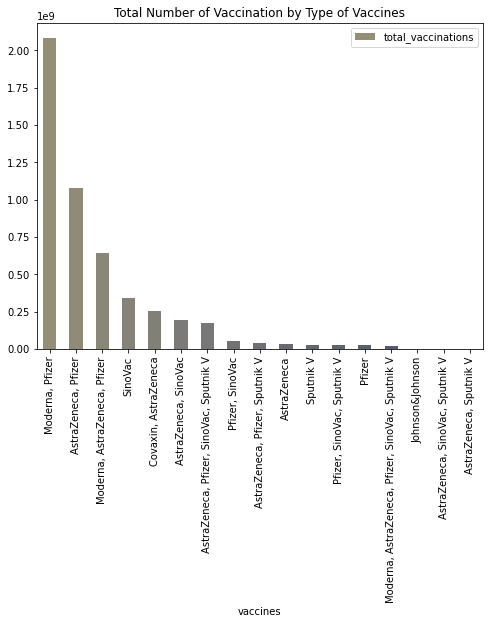

In [90]:
#color selection
color = cm.cividis_r(np.linspace(.4, .8, 20))

#plots the total vacciantion number by type of vaccines used
replace_df.plot(y='total_vaccinations', kind='bar', stacked=True, color=color, legend=True, figsize=(8, 6))

#plot title
plt.title('Total Number of Vaccination by Type of Vaccines')

# Which vaccines have the highest usage over all and per hundred people?

The last observation is based on which vaccines are used the highest amongst on hundred people over all and in which countries are getting which vaccines and it is going to see at a percentage level. As these values are by vaccines, the type of vaccines used by highest percentage of the people are the AstraZeneca, Pfizer vaccines. Again, the combination of the vaccines prevents us to have the accurate result, however, as Pfizer finds it self in the first three positions, it can be assumed that it is the highest used vaccine over all. In another plot a sample was taken based on the usage of a vaccine in a country with the highest number per one hundred people vaccinated and AstraZeneca/Pfizer vaccines seems to have the highest usage per hundred in the countries seen in the plot. AstraZeneca is made in England and that can explain why the UKs have highest number per hundred in the usage of vaccines.

Text(0.5, 1.0, 'Highest Number in Type of Vaccines Used Per One Hundred People')

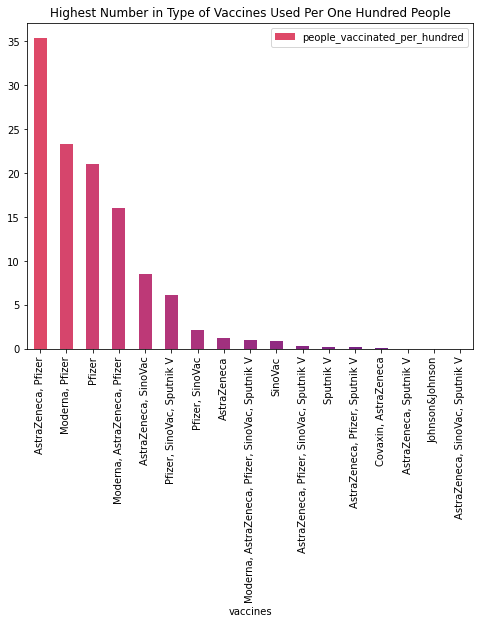

In [93]:
#grrops by type of vaccines and sorts by the sum of people vaccinated per hundred in descending order
vaccines_df = replace_df.groupby(['vaccines']).sum().sort_values(by=['people_vaccinated_per_hundred'], ascending=False)

#color selection
color = cm.magma_r(np.linspace(.4, .8, 20))

#plots the percentage of people vaccinated per type of vaccine
vaccines_df.plot(y='people_vaccinated_per_hundred', kind='bar', stacked=True, color=color, legend=True, figsize=(8, 6))

#plot title
plt.title('Highest Number in Type of Vaccines Used Per One Hundred People')

<bound method NDFrame.head of vaccines                      country         
Moderna, AstraZeneca, Pfizer  Lithuania           82
AstraZeneca, Pfizer           Northern Ireland    76
                              Wales               76
                              England             76
                              United Kingdom      76
                                                  ..
Sputnik V                     Paraguay             5
AstraZeneca                   South Korea          3
                              Ukraine              3
Pfizer                        Greenland            1
AstraZeneca                   Saint Helena         1
Name: people_vaccinated_per_hundred, Length: 112, dtype: int64>


Text(0.5, 1.0, 'Countries which Got (AstraZeneca, Pfizer) Vaccines per Hundred People ')

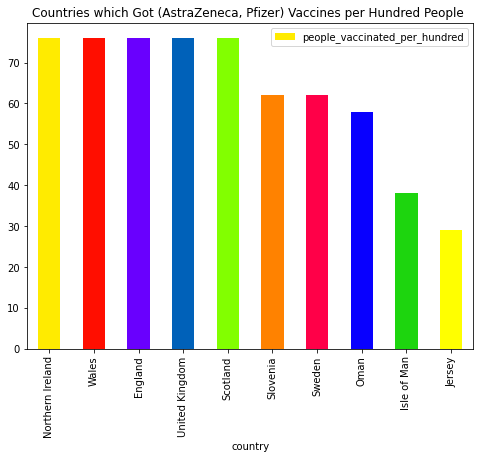

In [87]:
#groups first by vaccine type then by country and sortes the number of vaccinated people per hundred in descending order
group4_df = group3_df.groupby(["vaccines", "country"])["people_vaccinated_per_hundred"].size().sort_values(ascending=False)

#prints the result of the dataset
print(group4_df.head)

#locates the the AstraZeneca, Pfizer row from the vaccien types and assigns it to a variable
vaccines_df = group4_df.loc["AstraZeneca, Pfizer"]

#color selection
color = cm.prism_r(np.linspace(.4, .8, 20))

#plots the highest percentage of people per country and vaccine type 
vaccines_df.plot(y=['people_vaccinated_per_hundred'], kind='bar', stacked=True, color=color, legend=True, figsize=(8, 6))

#plot title
plt.title('Countries which Got (AstraZeneca, Pfizer) Vaccines per Hundred People ')

# Conclusion:

As seen from the plots above, this dataset can give enough information on the total number of vaccination, the percentage of vaccination and also the type of vaccines used. There is also a "date" column which was ignored because it didn't fit for the purpose of this article. However, it could have been more helpful if the usage of individual vaccines have been separated rather than put them as combination value. The rooms for progress are using the date column to find the daily results of vaccination and using also a GeoPandas library to plot in a world map.

# Source:

https://www.kaggle.com/gpreda/covid-world-vaccination-progress
